<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gestión de Outliers

AutoRenew, la empresa líder en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimización del inventario de la empresa. Ya has realizado un análisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gestión de outliers**.

En este laboratorio, te enfocarás en identificar y gestionar los outliers (valores atípicos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un análisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizarás el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las próximas etapas del proyecto.


In [ ]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product , combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from src.SupportOutliers import (
    plot_outliers_univariados,
    identificar_outliers_iqr,
    identificar_outliers_z,
    visualizar_outliers_bivariados
)

ImportError: cannot import name 'visualizar_outliers_bivariados5' from 'src.SupportOutliers' (c:\Users\ruipe\Desktop\Data Science\Semana 7\labs\laboratorio-modulo7-leccion03-gestion-outiers\src\SupportOutliers.py)

In [ ]:
df = pd.read_csv("datos/autorenew_feature_scaling.csv",index_col=0)
df.head()

,seller,offerType,brand,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,powerCV,price,yearOfRegistration,price_robust_scaler,powerCV_robust_scaler
0,private,offer,volkswagen,other,petrol,manually,unknown,150000,89.6,480.0,The 90's,-0.430645,-0.314869
1,private,offer,audi,coupe,diesel,manually,yes,125000,187.0,18300.0,The 2010,2.443548,1.104956
2,private,offer,jeep,suv,diesel,automatic,unknown,125000,161.0,9800.0,The 2000,1.072581,0.725948
3,private,offer,volkswagen,small car,petrol,manually,no,150000,74.0,1500.0,The 2000,-0.266129,-0.542274
4,private,offer,skoda,small car,diesel,manually,no,90000,68.0,3600.0,The 2000,0.072581,-0.629738


# 1 Identificación de Outliers
En nuestro caso contamos con dos categorías numéricas: **price** y **powerCV**, la variable precio es nuestra variable respuesta por lo que no podemos gestionar los outliers, podremos eliminarlos o dejarlos más adelante pero no nulificarlos no reemplazarlos por la media, pero si podemos usarla para observar los outliers univariados y multivariados.

Vamos a realizar unas gráficas, boxplot e histplot con intención de ver que ocurre como elementos univariados

### Nota
Vamos a usar las columnas **price_robust_scaler** y **powerCV_robust_scaler** que las hemos hecho para algo!, además es con las que hay que hacerlas, de ahora en adelante usamos estas, no vamos a borrar price y CV originales por tenerlas de referencia 

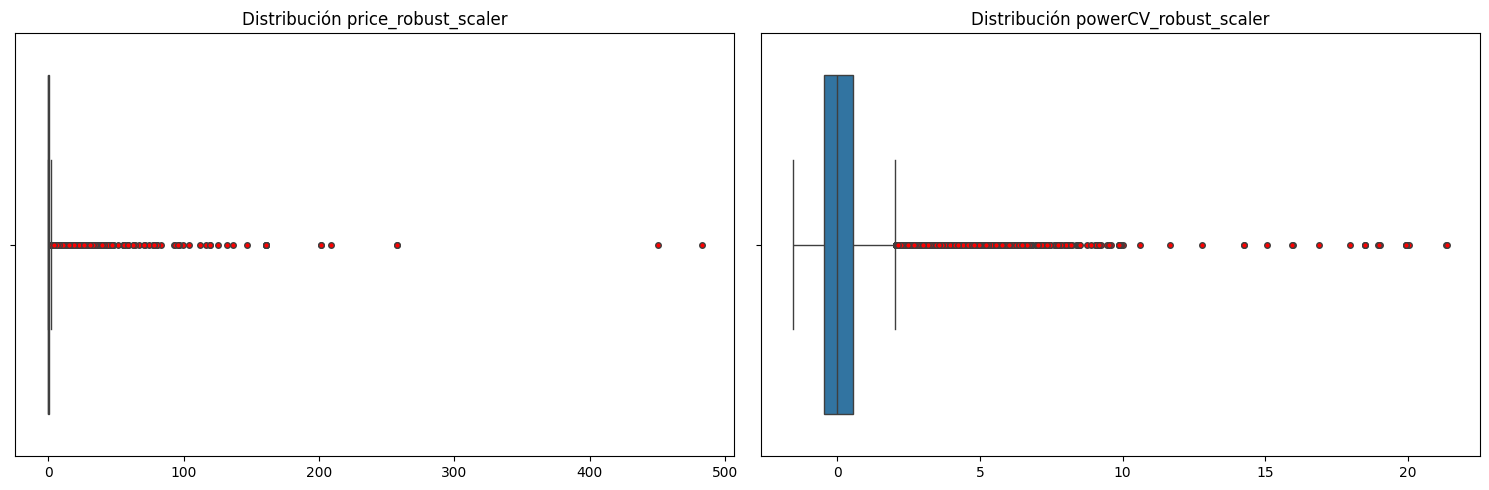

In [ ]:
df_num = df[["price_robust_scaler","powerCV_robust_scaler"]]
plot_outliers_univariados(df_num,"b",20,(15,5))

# Sobre las Gráficas
- Como ya sabíamos tenemos bastantes valores outliers en ambas gráficas, sobre todo en price, veamos el histplot

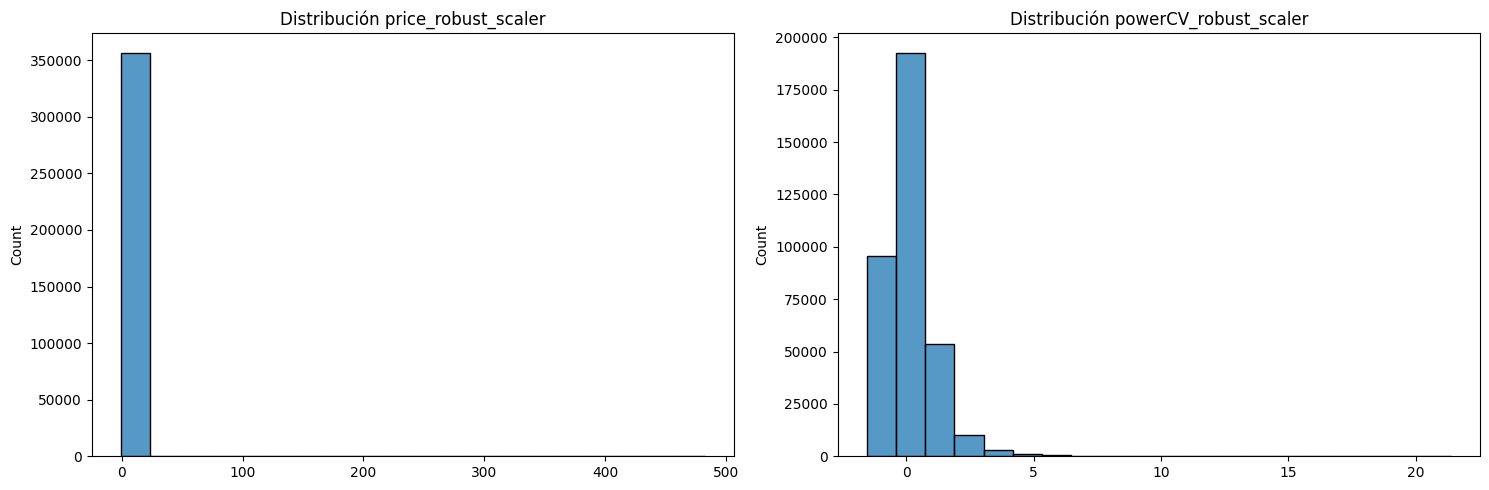

In [ ]:
df_num = df[["price_robust_scaler","powerCV_robust_scaler"]]
plot_outliers_univariados(df_num,"h",20,(15,5))

# Sobre las Gráficas
- No son datos normales.
- Tienen bastantes outliers

# Conclusiones
 
Viendo los datos que tenemos y que no son normales, esto nos lleva a tener que usar el método IQR! para el analisis de Outliers

# Identificar Multivariadas
Necesitamos dos variables o más para poder observarlos, ya que algunos outliers no aparecen hasta que las juntas
Para ello, vamos a usar scatterplots

In [ ]:
visualizar_outliers_bivariados()

# **Análisis de Outliers:** 
Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

Vamos a usar IQR para el análisis

In [ ]:
dictio_iqr = identificar_outliers_iqr(df_num)

La columna PRICE_ROBUST_SCALER tiene 26266 outliers entre el total de 356519 datos, es decir un 7.367349285732318%
La columna POWERCV_ROBUST_SCALER tiene 12390 outliers entre el total de 356519 datos, es decir un 3.4752706026887763%
